In [8]:
import random
import matplotlib.pyplot as plt
random.seed(123456)

def gambler_ruin_simulation(initial_fund, total_fund, win_probability, num_trials):
    wins = 0
    total_games = 0

    for _ in range(num_trials):
        fund = initial_fund
        games = 0

        while 0 < fund < total_fund:
            if random.random() < win_probability:
                fund += 1
            else:
                fund -= 1
            games += 1

        if fund == total_fund:
            wins += 1
        total_games += games

    win_probability_estimate = wins / num_trials
    average_games = total_games / num_trials

    return win_probability_estimate, average_games

initial_fund = 10
total_fund = 50
win_probability = 0.5
num_trials = 10000

estimated_win_probability, average_games_required = gambler_ruin_simulation(initial_fund, total_fund, win_probability, num_trials)

print(f"Estimated Probability of Winning: {estimated_win_probability}")
print(f"Average Number of Games Required: {average_games_required}")


Estimated Probability of Winning: 0.1989
Average Number of Games Required: 403.0262


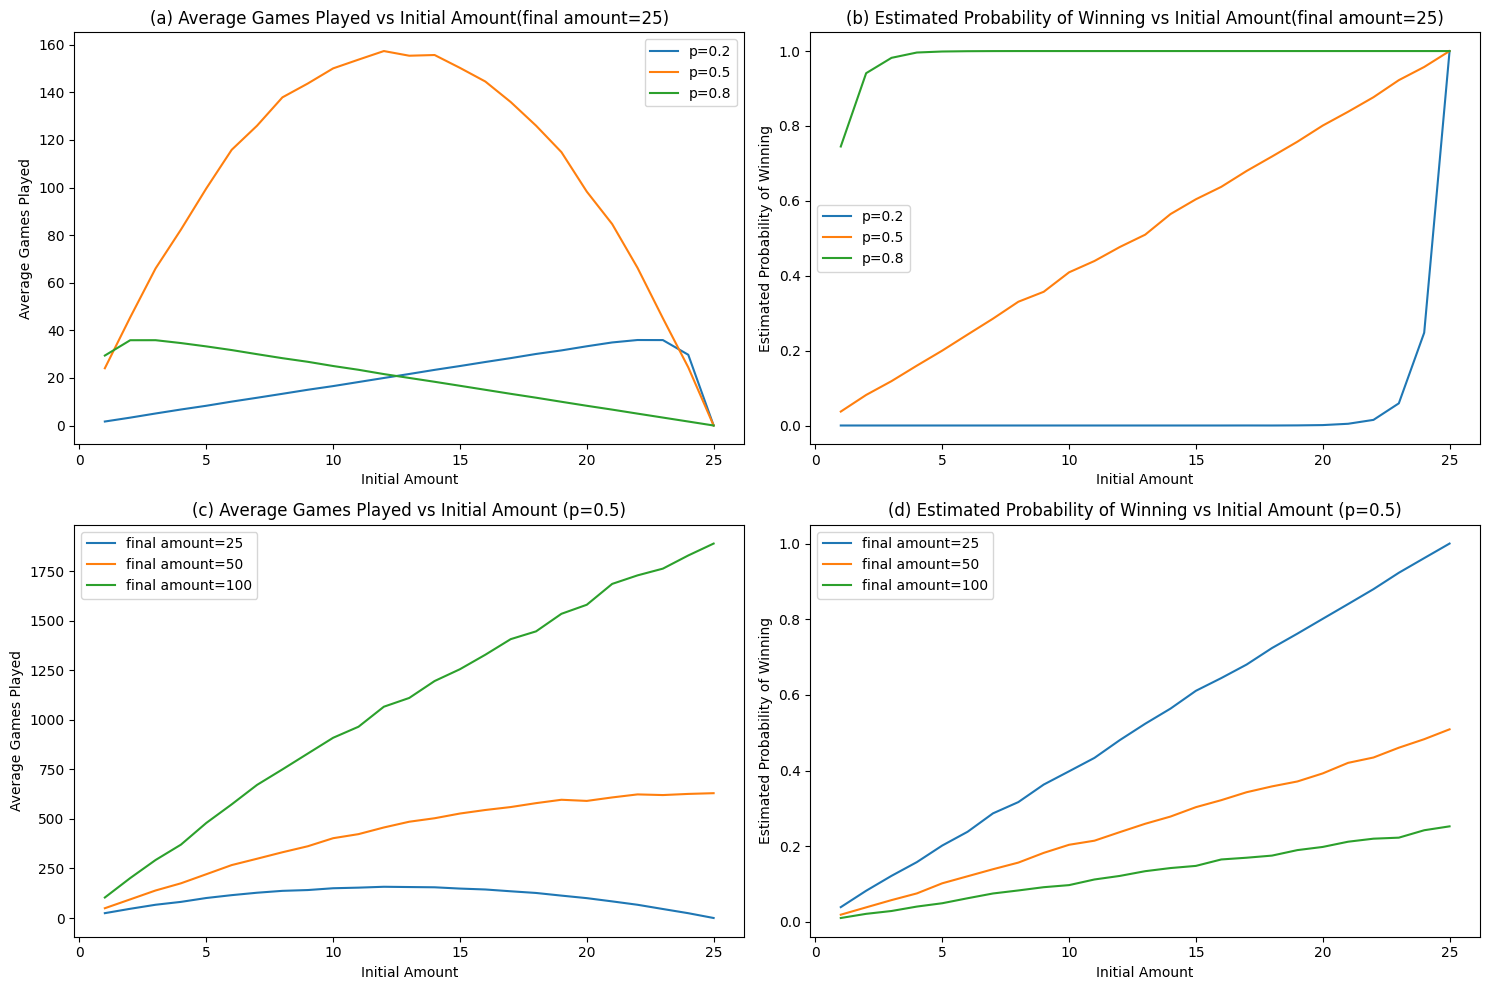

In [34]:
import random
import matplotlib.pyplot as plt

random.seed(123456)

def gambler_ruin_simulation(initial_fund, total_fund, win_probability, num_trials):
    wins = 0
    total_games = 0

    for _ in range(num_trials):
        fund = initial_fund
        games = 0

        while 0 < fund < total_fund:
            if random.random() < win_probability:
                fund += 1
            else:
                fund -= 1
            games += 1

        if fund == total_fund:
            wins += 1
        total_games += games

    win_probability_estimate = wins / num_trials
    average_games = total_games / num_trials

    return win_probability_estimate, average_games

def plot_varying_initial_fund(total_fund_values, win_probability_values, num_trials):
    initial_fund_values = range(1, min(total_fund_values)+1)
    
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))

    for win_probability in win_probability_values:
        avg_games_vs_initial_fund = []
        estimated_prob_vs_initial_fund = []

        for initial_fund in initial_fund_values:
            avg_games_sum = 0
            win_prob_sum = 0

            # for total_fund in total_fund_values:
            total_fund=min(total_fund_values)
            win_prob, avg_games = gambler_ruin_simulation(initial_fund, total_fund, win_probability, num_trials)
            avg_games_sum += avg_games
            win_prob_sum += win_prob

            # avg_games_vs_initial_fund.append(avg_games_sum / len(total_fund_values))
            # estimated_prob_vs_initial_fund.append(win_prob_sum / len(total_fund_values))
            avg_games_vs_initial_fund.append(avg_games_sum )
            estimated_prob_vs_initial_fund.append(win_prob_sum )

        axs[0, 0].plot(initial_fund_values, avg_games_vs_initial_fund, label=f'p={win_probability}')
        axs[0, 1].plot(initial_fund_values, estimated_prob_vs_initial_fund, label=f'p={win_probability}')

    for total_fund in total_fund_values:
        avg_games_vs_initial_fund = []
        estimated_prob_vs_initial_fund = []

        for initial_fund in initial_fund_values:
            avg_games_sum = 0
            win_prob_sum = 0

            # for win_probability in win_probability_values:
            win_probability=0.5
            win_prob, avg_games = gambler_ruin_simulation(initial_fund, total_fund, win_probability, num_trials)
            avg_games_sum += avg_games
            win_prob_sum += win_prob

            # avg_games_vs_initial_fund.append(avg_games_sum / len(win_probability_values))
            # estimated_prob_vs_initial_fund.append(win_prob_sum / len(win_probability_values))

            avg_games_vs_initial_fund.append(avg_games_sum )
            estimated_prob_vs_initial_fund.append(win_prob_sum )


        axs[1, 0].plot(initial_fund_values, avg_games_vs_initial_fund, label=f'final amount={total_fund}')
        axs[1, 1].plot(initial_fund_values, estimated_prob_vs_initial_fund, label=f'final amount={total_fund}')

    axs[0, 0].set_title('(a) Average Games Played vs Initial Amount(final amount=25)')
    axs[0, 0].set_xlabel('Initial Amount')
    axs[0, 0].set_ylabel('Average Games Played')
    axs[0, 0].legend()

    axs[0, 1].set_title('(b) Estimated Probability of Winning vs Initial Amount(final amount=25)')
    axs[0, 1].set_xlabel('Initial Amount')
    axs[0, 1].set_ylabel('Estimated Probability of Winning')
    axs[0, 1].legend()

    axs[1, 0].set_title('(c) Average Games Played vs Initial Amount (p=0.5)')
    axs[1, 0].set_xlabel('Initial Amount')
    axs[1, 0].set_ylabel('Average Games Played')
    axs[1, 0].legend()

    axs[1, 1].set_title('(d) Estimated Probability of Winning vs Initial Amount (p=0.5)')
    axs[1, 1].set_xlabel('Initial Amount')
    axs[1, 1].set_ylabel('Estimated Probability of Winning')
    axs[1, 1].legend()

    plt.tight_layout()
    plt.savefig("q1_gamblers.pdf")
    plt.show()

# Example usage
total_fund_values = [25, 50, 100]
win_probability_values = [0.2, 0.5, 0.8]
num_trials = 10000

plot_varying_initial_fund(total_fund_values, win_probability_values, num_trials)
